In [1]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
heart = pd.read_csv("C:\\Users\\user\\Desktop\\빅데이터 8기 김영규\\ML_DL\\ML_week1\\archive\\heart.csv")

In [3]:
heart

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [ ]:
## 순서 중요
# 테스트 input, 테스트 input, 훈련 타겟, 테스트 타겟

In [20]:
# 데이터에 범주형 데이터가 있기 때문에, 원-핫 코딩후 상관관계 확인
heart_encoded = pd.get_dummies(heart, columns=['sex', 'cp','fbs','restecg','exng','slp','caa','thall','output'])
corr_matrix = heart_encoded.corr()

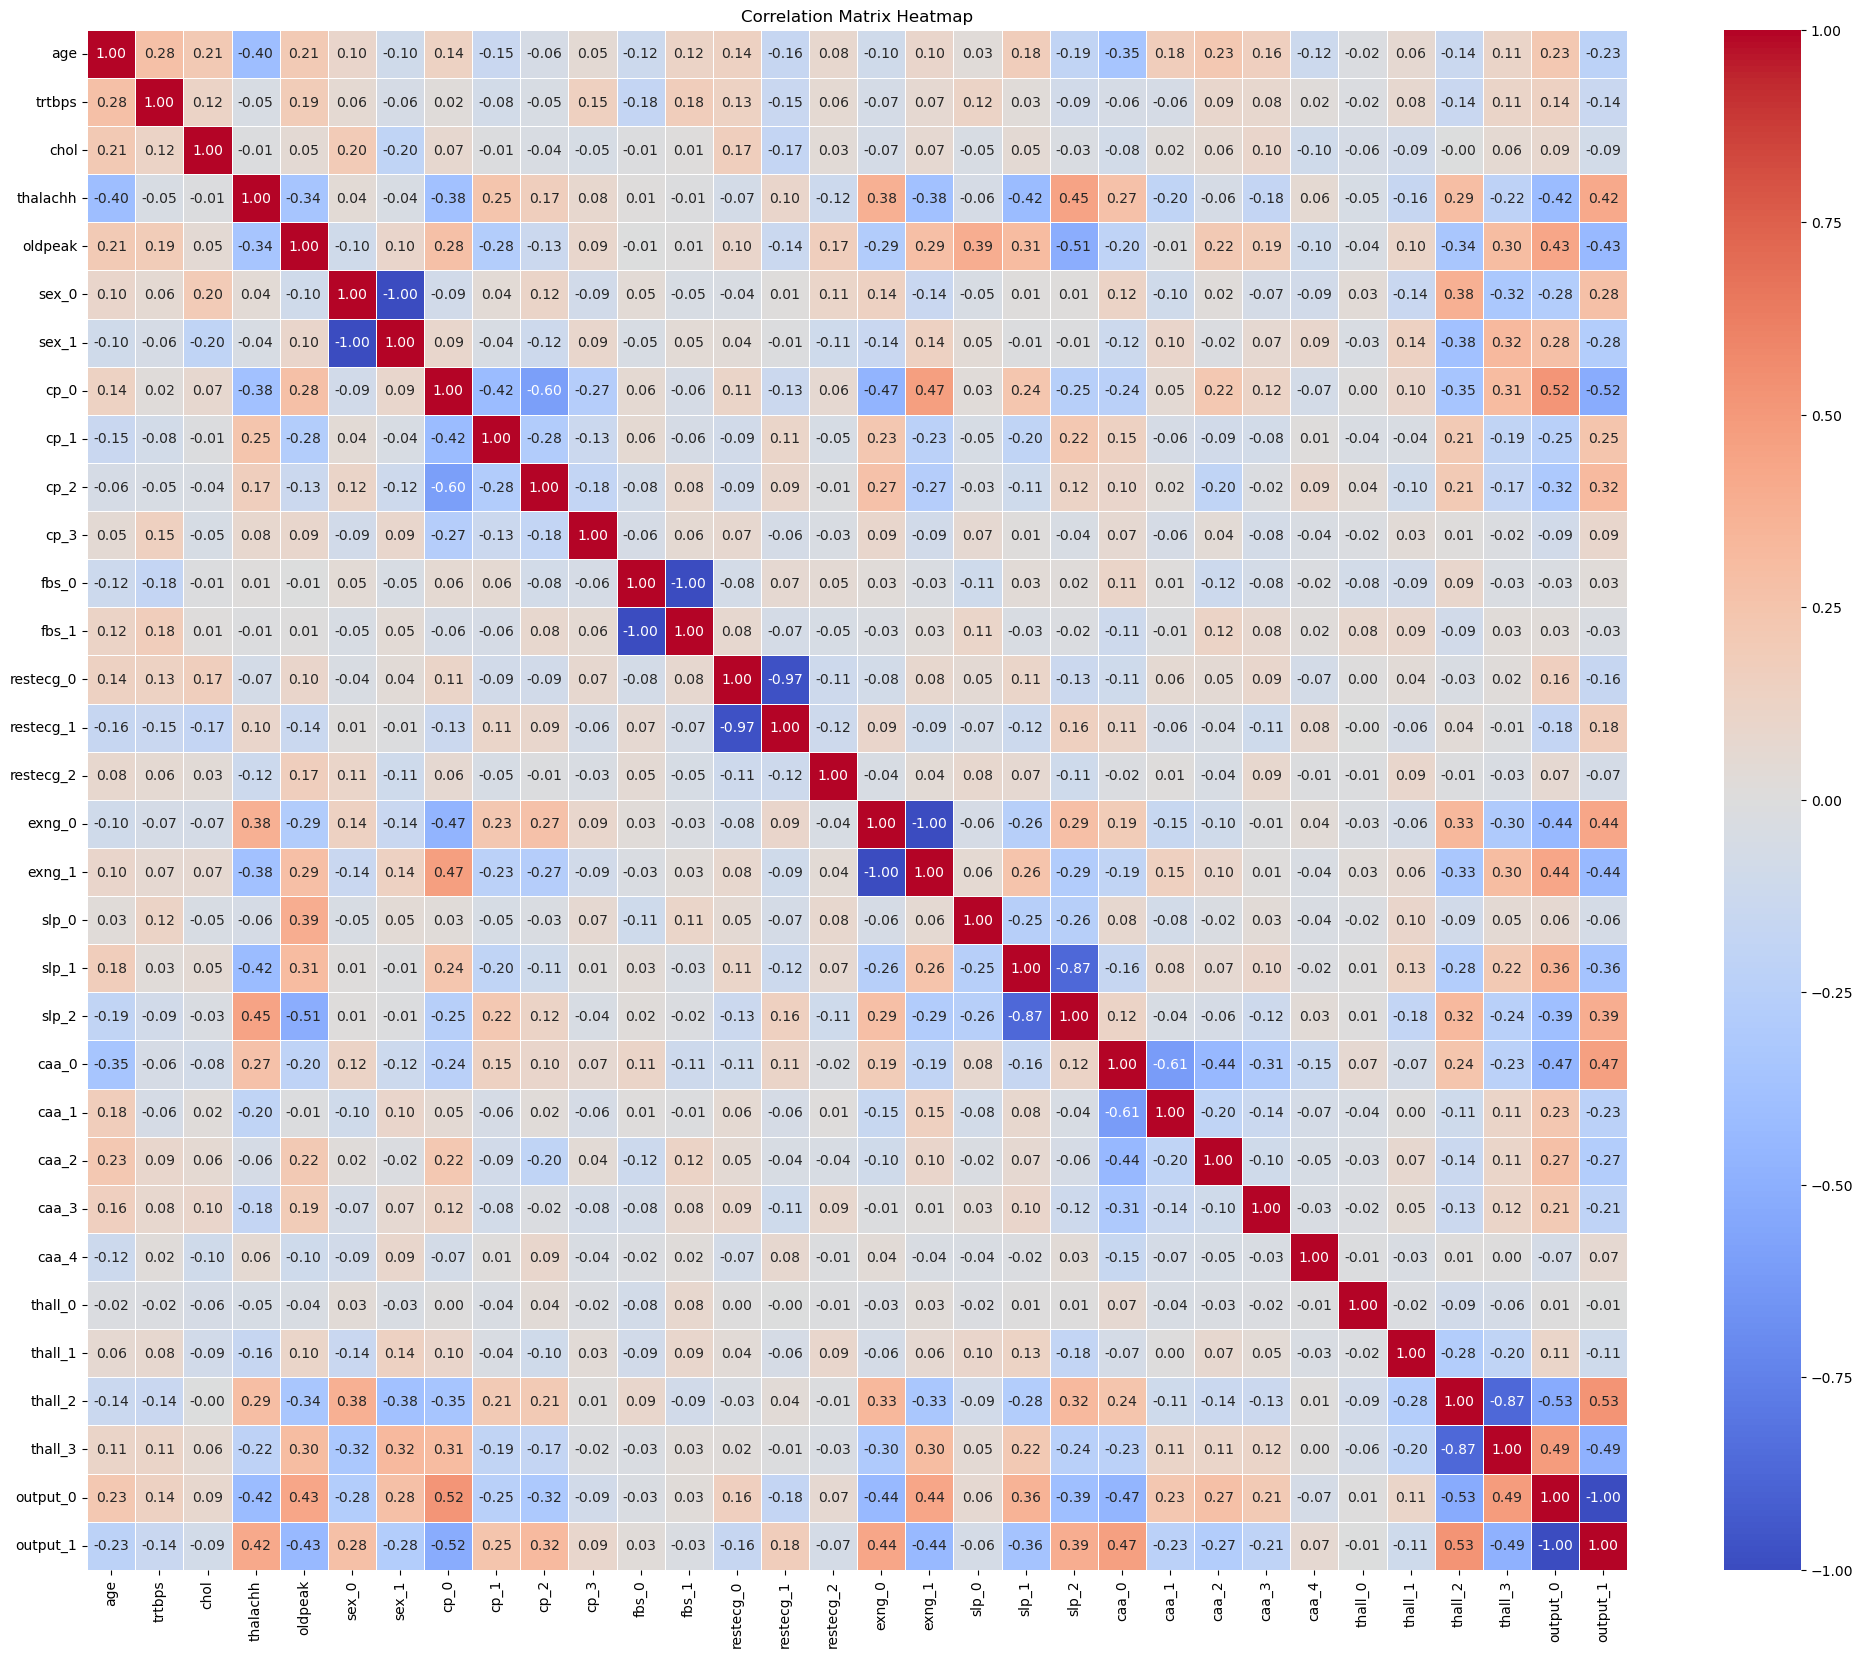

In [29]:
plt.figure(figsize=(25, 20))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True, linewidths=.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [4]:
## 타겟 데이터 = output
## age, thalachh, chol
## input class값 지정하기.
## 데이터 프레임으로 했으면, 데이터 프레임으로 넣기. array로 했으면 array로. 형태 맞춰주기

data_input = heart[['chol','thalachh','age']]
data_target = heart[['output']]

In [7]:
data_input = data_input.to_numpy() #input은 2차원 배열이여야함

In [8]:
data_input 

array([[233, 150,  63],
       [250, 187,  37],
       [204, 172,  41],
       [236, 178,  56],
       [354, 163,  57],
       [192, 148,  57],
       [294, 153,  56],
       [263, 173,  44],
       [199, 162,  52],
       [168, 174,  57],
       [239, 160,  54],
       [275, 139,  48],
       [266, 171,  49],
       [211, 144,  64],
       [283, 162,  58],
       [219, 158,  50],
       [340, 172,  58],
       [226, 114,  66],
       [247, 171,  43],
       [239, 151,  69],
       [234, 161,  59],
       [233, 179,  44],
       [226, 178,  42],
       [243, 137,  61],
       [199, 178,  40],
       [302, 162,  71],
       [212, 157,  59],
       [175, 123,  51],
       [417, 157,  65],
       [197, 152,  53],
       [198, 168,  41],
       [177, 140,  65],
       [219, 188,  44],
       [273, 152,  54],
       [213, 125,  51],
       [177, 160,  46],
       [304, 170,  54],
       [232, 165,  54],
       [269, 148,  65],
       [360, 151,  65],
       [308, 142,  51],
       [245, 180

In [9]:
data_target = data_target['output'].to_numpy() #타겟은 1차원 배열이여야함.

In [10]:
data_target

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [11]:
# 테스트 input, 테스트 input, 훈련 타겟, 테스트 타겟  stratify은 타겟이 범주형 변수일때 사용
train_input, test_input, train_target, test_target = train_test_split(
    data_input, data_target, stratify=data_target, random_state=27)

In [12]:
print(test_target)

[1 0 1 0 0 0 1 1 1 1 1 0 0 1 0 0 1 1 1 0 1 1 0 0 1 1 1 1 1 0 0 1 1 1 0 0 0
 1 0 1 1 0 1 0 0 1 1 1 0 1 0 1 0 0 0 0 0 1 1 0 1 0 1 0 0 1 1 1 1 0 0 0 1 1
 0 1]


In [13]:
# 정규화 (변량-평균/표준편차)
mean = np.mean(train_input, axis=0)
std = np.std(train_input,axis=0)
print(mean, std)

[246.20704846 148.64317181  54.82378855] [51.48975642 22.63774254  9.28049243]


In [14]:
# 훈련용 자료를 기준으로 한 정규화를 테스트 자료에도 적용
train_scaled = (train_input -mean)/ std
test_scaled = (test_input - mean) / std

# 예측할 class도 훈련용 자료를 기준으로 한 정규화 적용
new = ([231, 132, 27] - mean) / std

In [18]:
kn = KNeighborsClassifier()
kn.fit(train_input, train_target)
kn.score(test_input, test_target)

0.618421052631579

In [19]:
kn = KNeighborsClassifier()
kn.fit(train_scaled, train_target)
kn.score(test_scaled,test_target)

0.6710526315789473

In [21]:
print(kn.predict([new]))

[1]
